In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

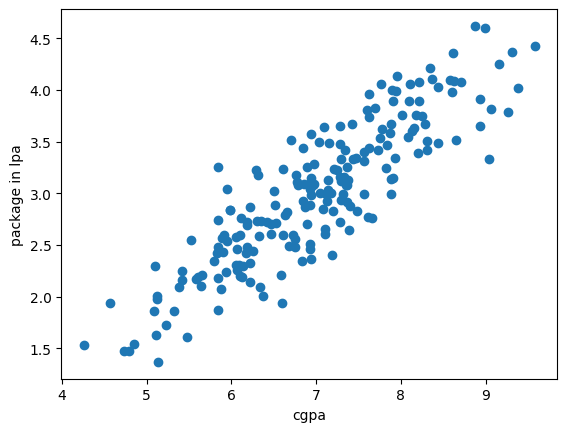

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package in lpa')

In [5]:
X=df.drop(columns='package')
y=df['package']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'package in lpa')

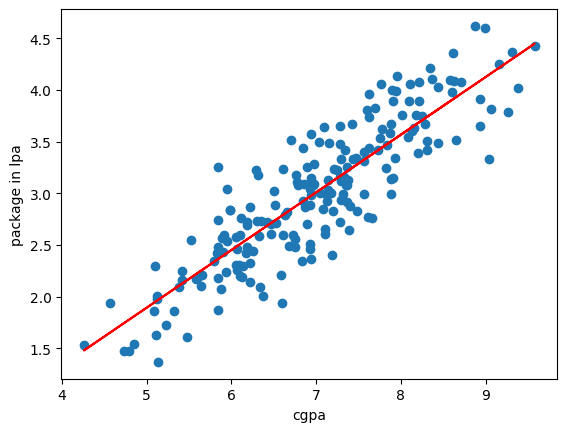

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package in lpa')

In [9]:
y_pred=lr.predict(X_test)

In [10]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [11]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
print('Mean Absolute Error is', mean_absolute_error(y_test,y_pred))

Mean Absolute Error is 0.2884710931878175


In [14]:
### The above output for MAE is in unit of target column, ie 0.28 lpa, ie, 2.8 lakhs

In [15]:
print('Mean squared Error is', mean_squared_error(y_test,y_pred))
#not in lap , the result

Mean squared Error is 0.12129235313495527


In [16]:
print('Root Mean squared Error is', np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean squared Error is 0.34827051717731616


In [17]:
### The above output for RMSE is in unit of target column, ie 0.34  lpa, ie, 3.4 lakhs

In [18]:
r2score=r2_score(y_test,y_pred)
#this means that it is explaning 78% variance in the output col

In [19]:
r2score
#this means that it is explaning 78% variance in the output col

0.780730147510384

In [20]:
##Adjusted R2 score
X_test.shape

(40, 1)

In [21]:
1 - ((1-r2score)*(40-1)/(40-1-1)) ##this is the adjusted r2squre

0.7749598882343415

In [22]:
### Adding new changes in dataframe , to see you r2 score changes

In [23]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.783355,3.26
1,5.12,0.364348,1.98
2,7.82,0.687000,3.25
3,7.42,0.438064,3.67
4,6.94,0.103549,3.57


Text(0, 0.5, 'package(in lpa)')

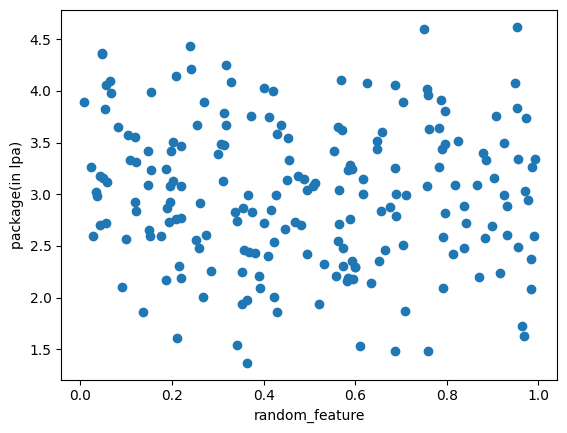

In [24]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')

In [25]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
r2score=r2_score(y_test,y_pred)
r2score
##as we can see, even with a random change, r2 score has slightly increased, which is not good

0.7858910154739509

In [30]:
1 - ((1-r2score)*(40-1)/(40-1-1)) ##this is the adjusted r2squre 
### adjusted r2 score  has dropped down

0.7802565685127391

In [31]:
###for next experiment, this time we will  add a dataframe that  has  an impact or is important feature

In [32]:

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [33]:

new_df2.sample(5)


,cgpa,iq,package
87,8.09,3.25,3.55
15,7.25,3.93,3.23
110,8.18,3.76,3.76
144,6.17,1.92,2.42
189,8.11,4.06,4.06


Text(0, 0.5, 'Package(in lpa)')

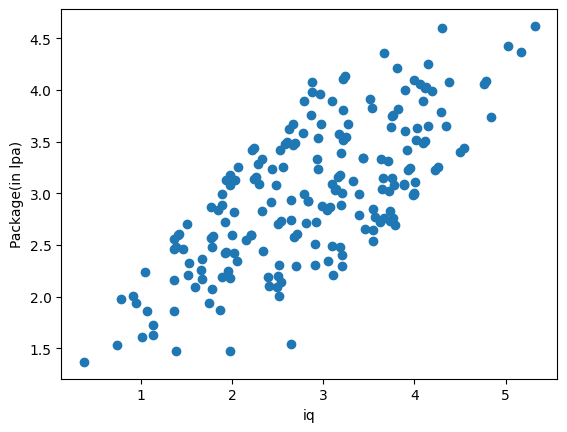

In [34]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [35]:
np.random.randint(-100,100)

37

In [36]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [37]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [41]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
#increased

R2 score 0.8395922361249191


In [40]:

1 - ((1-r2)*(40-1)/(40-1-2)) 
##Increased

0.8309215461857256